In [433]:
# importing some necessary library 
import pandas as pd # Data preporcessing
import numpy as np #Lienar algebra
import matplotlib.pyplot as plt #MATLAB style plotting
import seaborn as sns
sns.set(style='darkgrid')
plt.rc('font',size=14)

from scipy import stats
from scipy.stats import norm,skew #Statistics

import warnings #Ignore annoying warning
def ignore_warning(*args,**kwargs):
    pass
warnings.warn = ignore_warning

In [434]:
from subprocess import check_output
print(check_output(['ls','../Big_Mart_Problem/']).decode('utf8'))

Big_mart_solution.ipynb
SampleSubmission.csv
Test.csv
Train.csv



## Load Train & Test data

In [435]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [436]:
#Dislpay first five rows Trainnig dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [437]:
#Dislpay first five rows Test dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [438]:
train.shape

(8523, 12)

In [439]:
test.shape

(5681, 11)

## Variable Identification

In [440]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [441]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [442]:
train.get_dtype_counts()

float64    4
int64      1
object     7
dtype: int64

## Summary of dataset

In [449]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [450]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [451]:
y_train = train.Item_Outlet_Sales

In [452]:
n_train = train.shape[0]
n_test = test.shape[0]
print(n_train,n_test)

8523 5681


In [453]:
data = pd.concat(objs = (train,test)).reset_index(drop=True)

## Numerical and Categorical features


In [454]:
categorical_feats = data.dtypes[data.dtypes == "object"].index
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Categorical Features %d"%(len(categorical_feats)))
print("Number of Numerical Features %d"%(len(numerical_feats)))

Number of Categorical Features 7
Number of Numerical Features 5


In [455]:
print("Categorical Features :-")
print(data[categorical_feats].columns)
print("*"*100)
print("Numerical Features :- ")
print(data[numerical_feats].columns)

Categorical Features :-
Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')
****************************************************************************************************
Numerical Features :- 
Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')


In [456]:
data[categorical_feats].head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1


In [457]:
data[numerical_feats].head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987


## Feature with missing values

In [459]:
percent = data.isnull().sum()/len(data)*100
total = data.isnull().sum()

In [460]:
data_na_ratio = pd.concat(objs=[total,percent],axis=1,keys=['Total','Percent']).sort_values(by='Total',ascending=False)

In [461]:
data_na_ratio = data_na_ratio.drop(data_na_ratio[data_na_ratio['Total']==0].index)
data_na_ratio

,Total,Percent
Item_Outlet_Sales,5681,39.995776
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219


Text(0,0.5,'Percent of null value by feature')

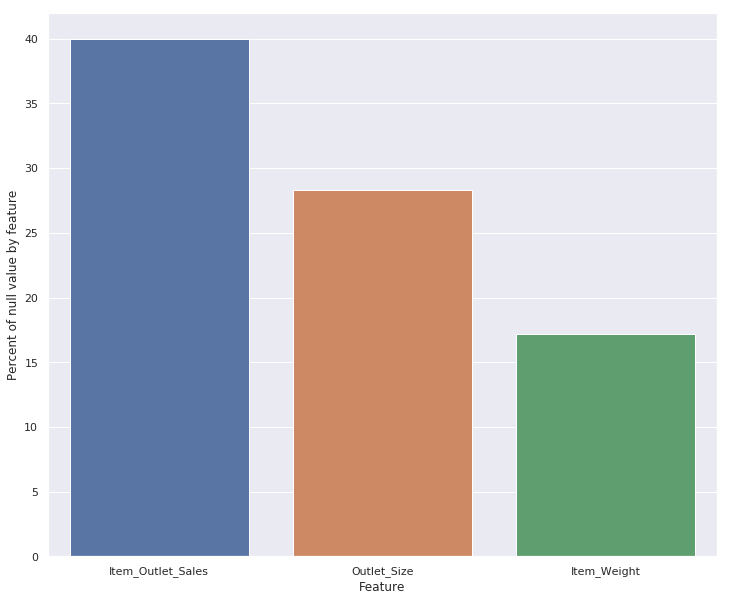

In [462]:
plt.figure(figsize=(12,10))
sns.barplot(x=data_na_ratio.index,y=data_na_ratio['Percent'])
plt.xlabel('Feature')
plt.ylabel('Percent of null value by feature')


## Filling missing values


In [463]:
data[categorical_feats] = data[categorical_feats].fillna(value=data[categorical_feats].mode())

In [464]:
d = numerical_feats!='Item_Outlet_Sales'

In [465]:
data[numerical_feats[d]] = data[numerical_feats[d]].fillna(value=data[numerical_feats[d]].mean())

In [466]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [467]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(value='Medium')

In [468]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

In [469]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Data Visualization

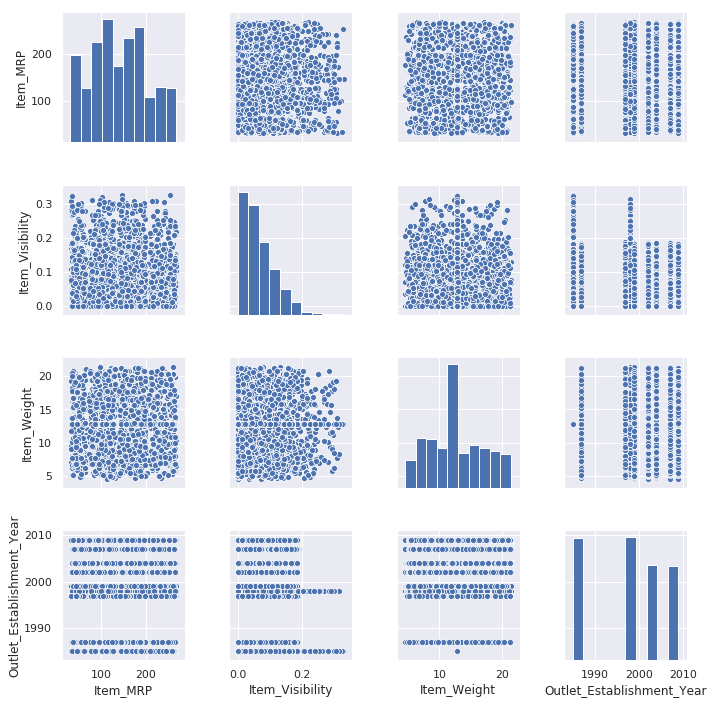

In [471]:
sns.pairplot(data.iloc[:,data.columns!='Item_Outlet_Sales'])

## Target Varible analysis

Skewness : 1.178
Kurtosis: 1.616


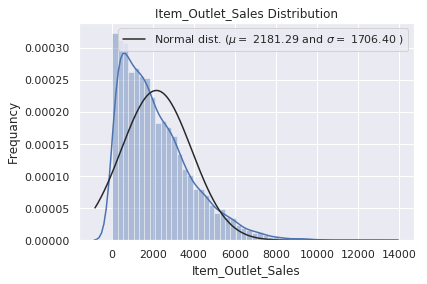

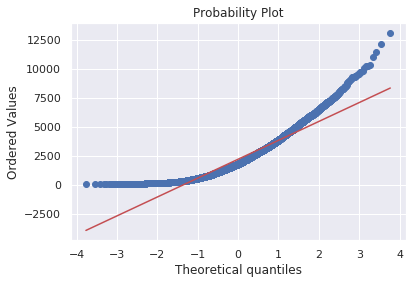

In [326]:
sns.distplot(a=y_train,fit=norm)
print("Skewness : %.3f"%(y_train.skew()))
print("Kurtosis: %.3f"%(y_train.kurt()))
plt.ylabel("Frequancy")
plt.title("Item_Outlet_Sales Distribution")
(mu,sigma) = norm.fit(y_train)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()
stats.probplot(x=y_train,plot=plt)
plt.show()

Skewness : -0.882
Kurtosis: 0.533


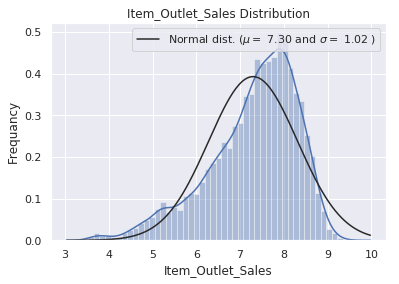

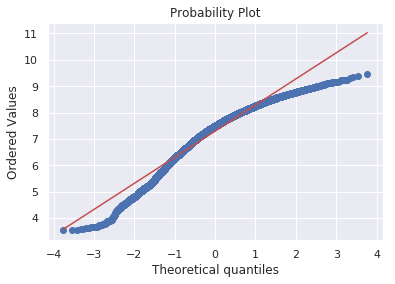

In [472]:
y_log_sales = np.log1p(y_train) #Log transformation
sns.distplot(a=y_log_sales,fit=norm)
print("Skewness : %.3f"%(y_log_sales.skew()))
print("Kurtosis: %.3f"%(y_log_sales.kurt()))
plt.ylabel("Frequancy")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.title("Item_Outlet_Sales Distribution")
(mu,sigma) = norm.fit(y_log_sales)
plt.show()
stats.probplot(x=y_log_sales,plot=plt)
plt.show()

## log transform


In [473]:
for i in numerical_feats:
    print("Skewness : %.3f"%(data[i]).skew())
    print("Kurtosis : %.3f"%data[i].kurt())
    print('*'*50)

Skewness : 0.131
Kurtosis : -0.894
**************************************************
Skewness : 1.178
Kurtosis : 1.616
**************************************************
Skewness : 1.195
Kurtosis : 1.820
**************************************************
Skewness : 0.111
Kurtosis : -0.861
**************************************************
Skewness : -0.396
Kurtosis : -1.206
**************************************************


In [474]:
skew_feats = data[numerical_feats].apply(lambda x:skew(x))
skew_feats

Item_MRP                     0.130715
Item_Outlet_Sales                 NaN
Item_Visibility              1.195049
Item_Weight                  0.111302
Outlet_Establishment_Year   -0.396423
dtype: float64

In [475]:
for i,column in enumerate(numerical_feats):
    if data[column].skew()>0.75:
        data[column] = np.log1p(data[column])
        

In [476]:
skew_feats = data[numerical_feats].apply(lambda x:skew(x))
skew_feats


Item_MRP                     0.130715
Item_Outlet_Sales                 NaN
Item_Visibility              1.038775
Item_Weight                  0.111302
Outlet_Establishment_Year   -0.396423
dtype: float64

## plotting correlations


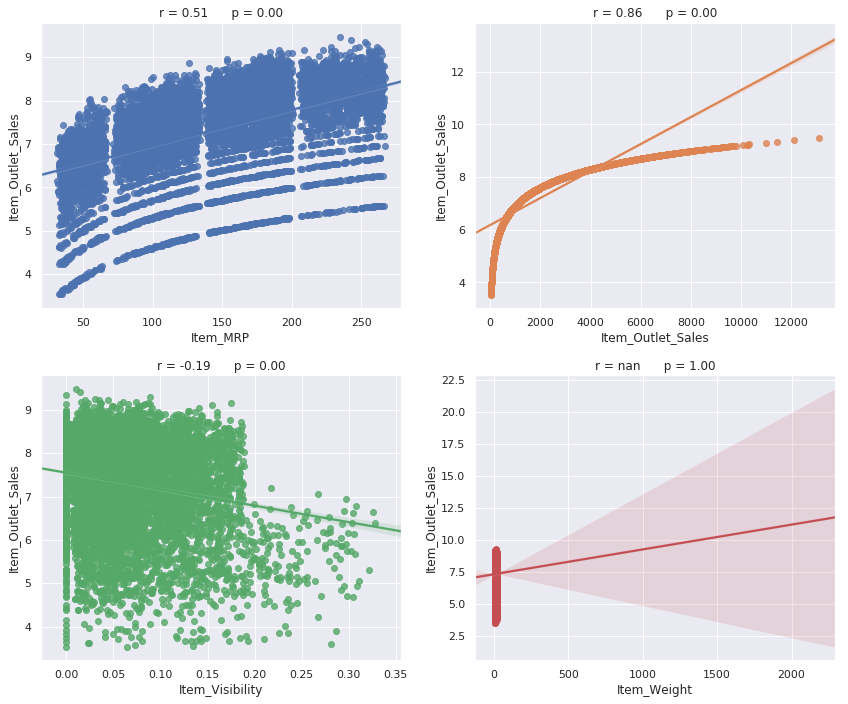

In [477]:
nrows = 2
ncols = 2
k=0
fig,axes = plt.subplots(nrows,ncols,figsize=(12,10))
for i in range(nrows):
    for j in range(ncols):
        x = train.loc[:,numerical_feats[k]]
        cor = stats.pearsonr(x,y_log_sales)
        sns.regplot(x,y_log_sales, ax = axes[i][j])
        str_title = "r = " + "{0:.2f}".format(cor[0]) + "      " "p = " + "{0:.2f}".format(cor[1])
        axes[i][j].set_title(str_title)
        k+=1
plt.tight_layout()

## Encoding

In [478]:
data['Outlet'] = data['Outlet_Identifier']

In [479]:
data_1 = pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'],drop_first=True)

In [480]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Outlet                        object
dtype: object

In [481]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 42 columns):
Item_Identifier                    14204 non-null object
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Outlet_Establishment_Year          14204 non-null int64
Outlet_Identifier                  14204 non-null object
Item_Fat_Content_Low Fat           14204 non-null uint8
Item_Fat_Content_Regular           14204 non-null uint8
Item_Fat_Content_low fat           14204 non-null uint8
Item_Fat_Content_reg               14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 n

In [482]:
data_1.shape

(14204, 42)

In [483]:
data_1.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Type_Supermarket Type3,Outlet_OUT013,Outlet_OUT017,Outlet_OUT018,Outlet_OUT019,Outlet_OUT027,Outlet_OUT035,Outlet_OUT045,Outlet_OUT046,Outlet_OUT049
0,FDA15,249.8092,8.225808,0.015920,9.30,1999,OUT049,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,6.096776,0.019095,5.92,2009,OUT018,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,7.648868,0.016621,17.50,1999,OUT049,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,6.597664,0.000000,19.20,1998,OUT010,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,6.903451,0.000000,8.93,1987,OUT013,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [484]:
train = data_1[:n_train]
test = data_1[n_train:]

In [485]:
train.shape

(8523, 42)

In [486]:
test.shape

(5681, 42)

In [487]:
test = test.drop(labels="Item_Outlet_Sales",axis=1).reset_index(drop=True)

In [488]:
train.to_csv('train_modified.csv',index=False)
test.to_csv("test_modified_csv",index=False)